# Emergency Room

Everyone is enjoying the summer, Covid19 restrictions have been lifted, we all get back to regular exercise and outdoor activities. But once in a while, the inevitable happens: An ill-considered step, a brief second of inattention, and injuries all of all types will happen, that require immediate treatment. Luckily our city hosts a modern hospital with an efficient emergency room where the wounded are being taken care of.

The simulation of hospital environment is a very popular. See [Günal 2010](https://www.tandfonline.com/doi/abs/10.1057/jos.2009.25?journalCode=tjsm20) for an excellent review.

To save more lives, the mayor has asked us to review and potentially improve process efficiency in the ER. To do so, we need to realize the following steps

1. Understand the current process and model is as simulation
2. Formulate key objectives to be optimized
2. Assess process statistics and metrics, to unravel potential improvements to help more patients.
3. Explore more optimized decision policies to increase

So let's dive right into it without further ado.

## Process Model


Patients are classified two-fold
1. By **Severity**. The ER is using the well known [Emergency Severity Index](https://en.wikipedia.org/wiki/Emergency_Severity_Index) to triage patients based on the acuity of patients' health care problems, and the number of resources their care is anticipated to require.
2. **Type of injury** which are defined [here](https://medlineplus.gov/woundsandinjuries.html)

Resources

* Surgery **rooms** that must be
  equipped by considering the type (i.e., the family) of surgery to
  be performed. It will take time to prepare a room for a certain type of injury. These setup times are listed in an excel sheet.
* **Doctors** that are qualified for a subset of all possible injuries

Process dynamics

* **PD-A** Depending on the severity, patients might die if not being treated. Also, if not being treated their severity will increase rather quickly
* **PD-B** The more busy the waiting room is, the less efficient surgeries tend to be. This is because of stress (over-allocation of supporting personal and material). It is phenomenon that is often observed complex queuing processes such as manufacturing or customer services.
* **PD-C** Depending on the severity, patients will die during surgery
* **PD-D** The surgery time correlates with the severity of the injury
* **PD-E** During nights fewer new patients arrive compared to the day

Clearly, more resources are required in the ER and many supported processes are required to run it. However, we leave these out here, as they are not considered to have a major impact on the overall process efficiency. Choosing a correct level of abstraction with a focus on key actors and resources, is the first _key to success_ when optimizing a complex process.


## Key Objectives & Observations

There are two competing processes. First, patient status will detoriate if not treated in time. Eventually, patients will pass away. The treatment process, counters and stops this first process. It must be maximized to minimize loss of life, minimize treatment efforts, while also maximizing treatment efficiency.

The head nurse, who is governing the process based on her long-term experience, is scheduling patients based on the following principle
 > Most urgent injuries first

[comment]: <> (   https://www.merriam-webster.com/dictionary/first%20come%2C%20first%20served)

Clearly if possible it would be great to also
* Minimize waiting times
* Reduce number of surgery room setups

## Analysis

Because of the great variety rooms, we observe a lot of setup steps to prepare surgery rooms. Often even if patients with the same type of injury all already waiting.

## Process Optimization

The idea for model above was orginally formulated by [Kramer et al. in 2019](todo reference) :
> Other relevant applications arise in the context of health-care, where, for example, patients have to be assigned to surgery rooms that must be  equipped by considering the type (i.e., the family) of surgery to be performed. In such cases, the weight usually models a level of urgency for the patient.


## Implementation

The tick-unit of the simulation is hours.

In [1]:
@file:Repository("*mavenLocal")
@file:DependsOn("com.github.holgerbrandl:kalasim:0.6.97-SNAPSHOT")

//@file:DependsOn("com.github.holgerbrandl:kalasim:0.6.92")
@file:DependsOn("com.github.holgerbrandl:kravis:0.8.1")
@file:DependsOn("org.jetbrains.kotlinx:kotlinx-coroutines-core:1.5.2")

In [2]:
import krangl.*

import org.kalasim.*
import PatientStatus.*
import Severity.*
import org.kalasim.*
import org.kalasim.monitors.MetricTimeline
import kotlin.math.pow
import kotlin.math.sqrt
import kotlin.random.Random

import org.kalasim.examples.er.*


## Simulation

In [3]:
val er = EmergencyRoom(RefittingAvoidanceNurse)

time      current               receiver              action                                       info                               
--------- --------------------- --------------------- -------------------------------------------- ----------------------------------
.00                             main                  create
.00       main                  Dr 0                  Created                                      capacity=1
.00                             Dr 1                  Created                                      capacity=1
.00                             Dr 2                  Created                                      capacity=1
.00                             Dr 3                  Created                                      capacity=1
.00                             Dr 4                  Created                                      capacity=1
.00                             Dr 5                  Created                                      capacity=1
.00       

Now run it for some days

In [4]:
er.run(24.0*7)

.00                             main                  run +168.00                                  scheduled for 168.00
.00       room 0                room 0                cancel
.00       room 1                room 1                cancel
.00       room 2                room 2                cancel
.00       room 3                room 3                cancel
.00       ComponentGenerator.1  ComponentGenerator.1  hold +.09                                    scheduled for .09
.09                             Patient.1             create
.09                                                   activate                                     scheduled for .09
skipping patient (out-of-office
.09                             ComponentGenerator.1  hold +.16                                    scheduled for .25
.09       Patient.1             Patient.1             Ended
.25       ComponentGenerator.1  Patient.2             create
.25                                                   activate         

3.09                            ComponentGenerator.1  hold +.20                                    scheduled for 3.28
3.09      Patient.15            Patient.15            Ended
3.09      room 1                room 1                hold +.12  preparing room room 1 for Bruises scheduled for 3.20
3.20                                                  Requesting 1.0 from Dr 2 with priority n...
3.20                                                  Requesting 1.0 from Dr 3 with priority n...
3.20                                                  Requesting 1.0 from Dr 4 with priority n...
3.20                                                  Requesting 1.0 from Dr 5 with priority n...
3.20                                                  Claimed 1.0 from 'room 1'
3.20                                                  Request honored by Dr 2                      scheduled for 3.20
3.20                                                  hold +.83  Surgery of patient Patient(ty... scheduled for 4.

5.93                                                  activate                                     scheduled for 5.93
5.93                            room 0                activate process=process                     scheduled for 5.93
5.93                            ComponentGenerator.1  hold +.02                                    scheduled for 5.95
5.93      Patient.30            Patient.30            Ended
5.93      room 0                room 0                hold +.10  preparing room room 0 for Ani... scheduled for 6.03
5.95      ComponentGenerator.1  Patient.31            create
5.95                                                  activate                                     scheduled for 5.95
skipping patient (out-of-office
5.95                            ComponentGenerator.1  hold +.00                                    scheduled for 5.95
5.95      Patient.31            Patient.31            Ended
5.95      ComponentGenerator.1  Patient.32            create
5.95               

7.82      Patient.47            Patient.47            Ended
8.09      ComponentGenerator.1  Patient.48            create
8.09                                                  activate                                     scheduled for 8.09
8.09                            room 0                activate process=process                     scheduled for 8.09
8.09                            ComponentGenerator.1  hold +.28                                    scheduled for 8.37
8.09      Patient.48            Patient.48            Ended
8.09      room 0                room 0                hold +.12  preparing room room 0 for Cuts    scheduled for 8.21
8.21                                                  Requesting 1.0 from Dr 1 with priority n...
8.21                                                  Requesting 1.0 from Dr 2 with priority n...
8.21                                                  Requesting 1.0 from Dr 4 with priority n...
8.21                                                 

9.25      room 1                room 1                hold +.70  Surgery of patient Patient(ty... scheduled for 9.95
9.40      ComponentGenerator.1  Patient.54            create
9.40                                                  activate                                     scheduled for 9.40
9.40                            room 3                activate process=process                     scheduled for 9.40
9.40                            ComponentGenerator.1  hold +.13                                    scheduled for 9.53
9.40      Patient.54            Patient.54            Ended
9.40      room 3                room 3                Requesting 1.0 from Dr 2 with priority n...
9.40                                                  request                                      scheduled for <inf>
9.53      ComponentGenerator.1  Patient.55            create
9.53                                                  activate                                     scheduled for 9.53
9.53        

10.65                                                 Requesting 1.0 from Dr 2 with priority n...
10.65                                                 Requesting 1.0 from Dr 3 with priority n...
10.65                                                 Claimed 1.0 from 'room 2'
10.65                                                 Request honored by Dr 0                      scheduled for 10.65
10.65                                                 hold +.59  Surgery of patient Patient(ty... scheduled for 11.24
10.69     room 3                room 3                Requesting 1.0 from Dr 2 with priority n...
10.69                                                 Requesting 1.0 from Dr 3 with priority n...
10.69                                                 Requesting 1.0 from Dr 4 with priority n...
10.69                                                 Requesting 1.0 from Dr 5 with priority n...
10.69                                                 Claimed 1.0 from 'room 3'
10.69          

12.19                                                 Requesting 1.0 from Dr 2 with priority n...
12.19                                                 Requesting 1.0 from Dr 3 with priority n...
12.19                                                 Claimed 1.0 from 'room 1'
12.19                                                 Request honored by Dr 0                      scheduled for 12.19
12.19                                                 hold +1.06  Surgery of patient Patient(t... scheduled for 13.25
12.21     ComponentGenerator.1  Patient.68            create
12.21                                                 activate                                     scheduled for 12.21
12.21                           ComponentGenerator.1  hold +.00                                    scheduled for 12.21
12.21     Patient.68            Patient.68            Ended
12.21     ComponentGenerator.1  Patient.69            create
12.21                                                 activate     

13.48                                                 Requesting 1.0 from Dr 5 with priority n...
13.48                                                 Claimed 1.0 from 'room 3'
13.48                                                 Request honored by Dr 1                      scheduled for 13.48
13.48                                                 hold +1.85  Surgery of patient Patient(t... scheduled for 15.33
13.74     ComponentGenerator.1  Patient.79            create
13.74                                                 activate                                     scheduled for 13.74
13.74                           ComponentGenerator.1  hold +.40                                    scheduled for 14.15
13.74     Patient.79            Patient.79            Ended
13.81     room 2                room 2                surgery of Patient(type=SprainsAndStrain...
13.81                                                 Released 1.0 from 'room 2'
13.81                           room 0         

16.00                           ComponentGenerator.1  hold +.00                                    scheduled for 16.00
16.00     Patient.86            Patient.86            Ended
16.00     ComponentGenerator.1  Patient.87            create
16.00                                                 activate                                     scheduled for 16.00
16.00                           ComponentGenerator.1  hold +.02                                    scheduled for 16.02
16.00     Patient.87            Patient.87            Ended
16.02     ComponentGenerator.1  Patient.88            create
16.02                                                 activate                                     scheduled for 16.02
16.02                           ComponentGenerator.1  hold +.29                                    scheduled for 16.32
16.02     Patient.88            Patient.88            Ended
16.07     room 1                room 1                surgery of Patient(type=Dislocations, se...
16.07

17.44                                                 Claimed 1.0 from 'room 0'
17.44                                                 Request honored by Dr 2                      scheduled for 17.44
17.44                                                 hold  Surgery of patient Patient(type=Sp... scheduled for 17.44
17.44                                                 surgery of Patient(type=SprainsAndStrain...
17.44                                                 Released 1.0 from 'room 0'
17.44                                                 ResourceActivityEvent(start=17.44, end=1...
17.44                                                 Requesting 1.0 from Dr 2 with priority n...
17.44                                                 Claimed 1.0 from 'room 0'
17.44                                                 Request honored by Dr 2                      scheduled for 17.44
17.44                                                 hold +1.21  Surgery of patient Patient(t... scheduled f

19.72     Patient.109           Patient.109           Ended
19.72     ComponentGenerator.1  Patient.110           create
19.72                                                 activate                                     scheduled for 19.72
skipping patient (out-of-office
19.72                           ComponentGenerator.1  hold +.50                                    scheduled for 20.22
19.72     Patient.110           Patient.110           Ended
19.82     room 2                room 2                surgery of Patient(type=Cuts, severity=S...
19.82                                                 Released 1.0 from 'room 2'
19.82                                                 ResourceActivityEvent(start=16.69, end=1...
19.82                                                 Requesting 1.0 from Dr 1 with priority n...
19.82                                                 Requesting 1.0 from Dr 2 with priority n...
19.82                                                 Requesting 1.0 from Dr

22.16     Patient.120           Patient.120           Ended
22.28     ComponentGenerator.1  Patient.121           create
22.28                                                 activate                                     scheduled for 22.28
skipping patient (out-of-office
22.28                           ComponentGenerator.1  hold +.08                                    scheduled for 22.36
22.28     Patient.121           Patient.121           Ended
22.36     ComponentGenerator.1  Patient.122           create
22.36                                                 activate                                     scheduled for 22.36
skipping patient (out-of-office
22.36                           ComponentGenerator.1  hold +.21                                    scheduled for 22.57
22.36     Patient.122           Patient.122           Ended
22.46     room 1                room 1                surgery of Patient(type=Dislocations, se...
22.46                                                 Releas

23.37     Patient.130           Patient.130           Ended
23.63     Compon

{
  "now": "168.00",
  "num_components": 903,
  "queue": [
    "room 0",
    "room 3",
    "ComponentGenerator.1",
    "room 2",
    "room 1"
  ]
}

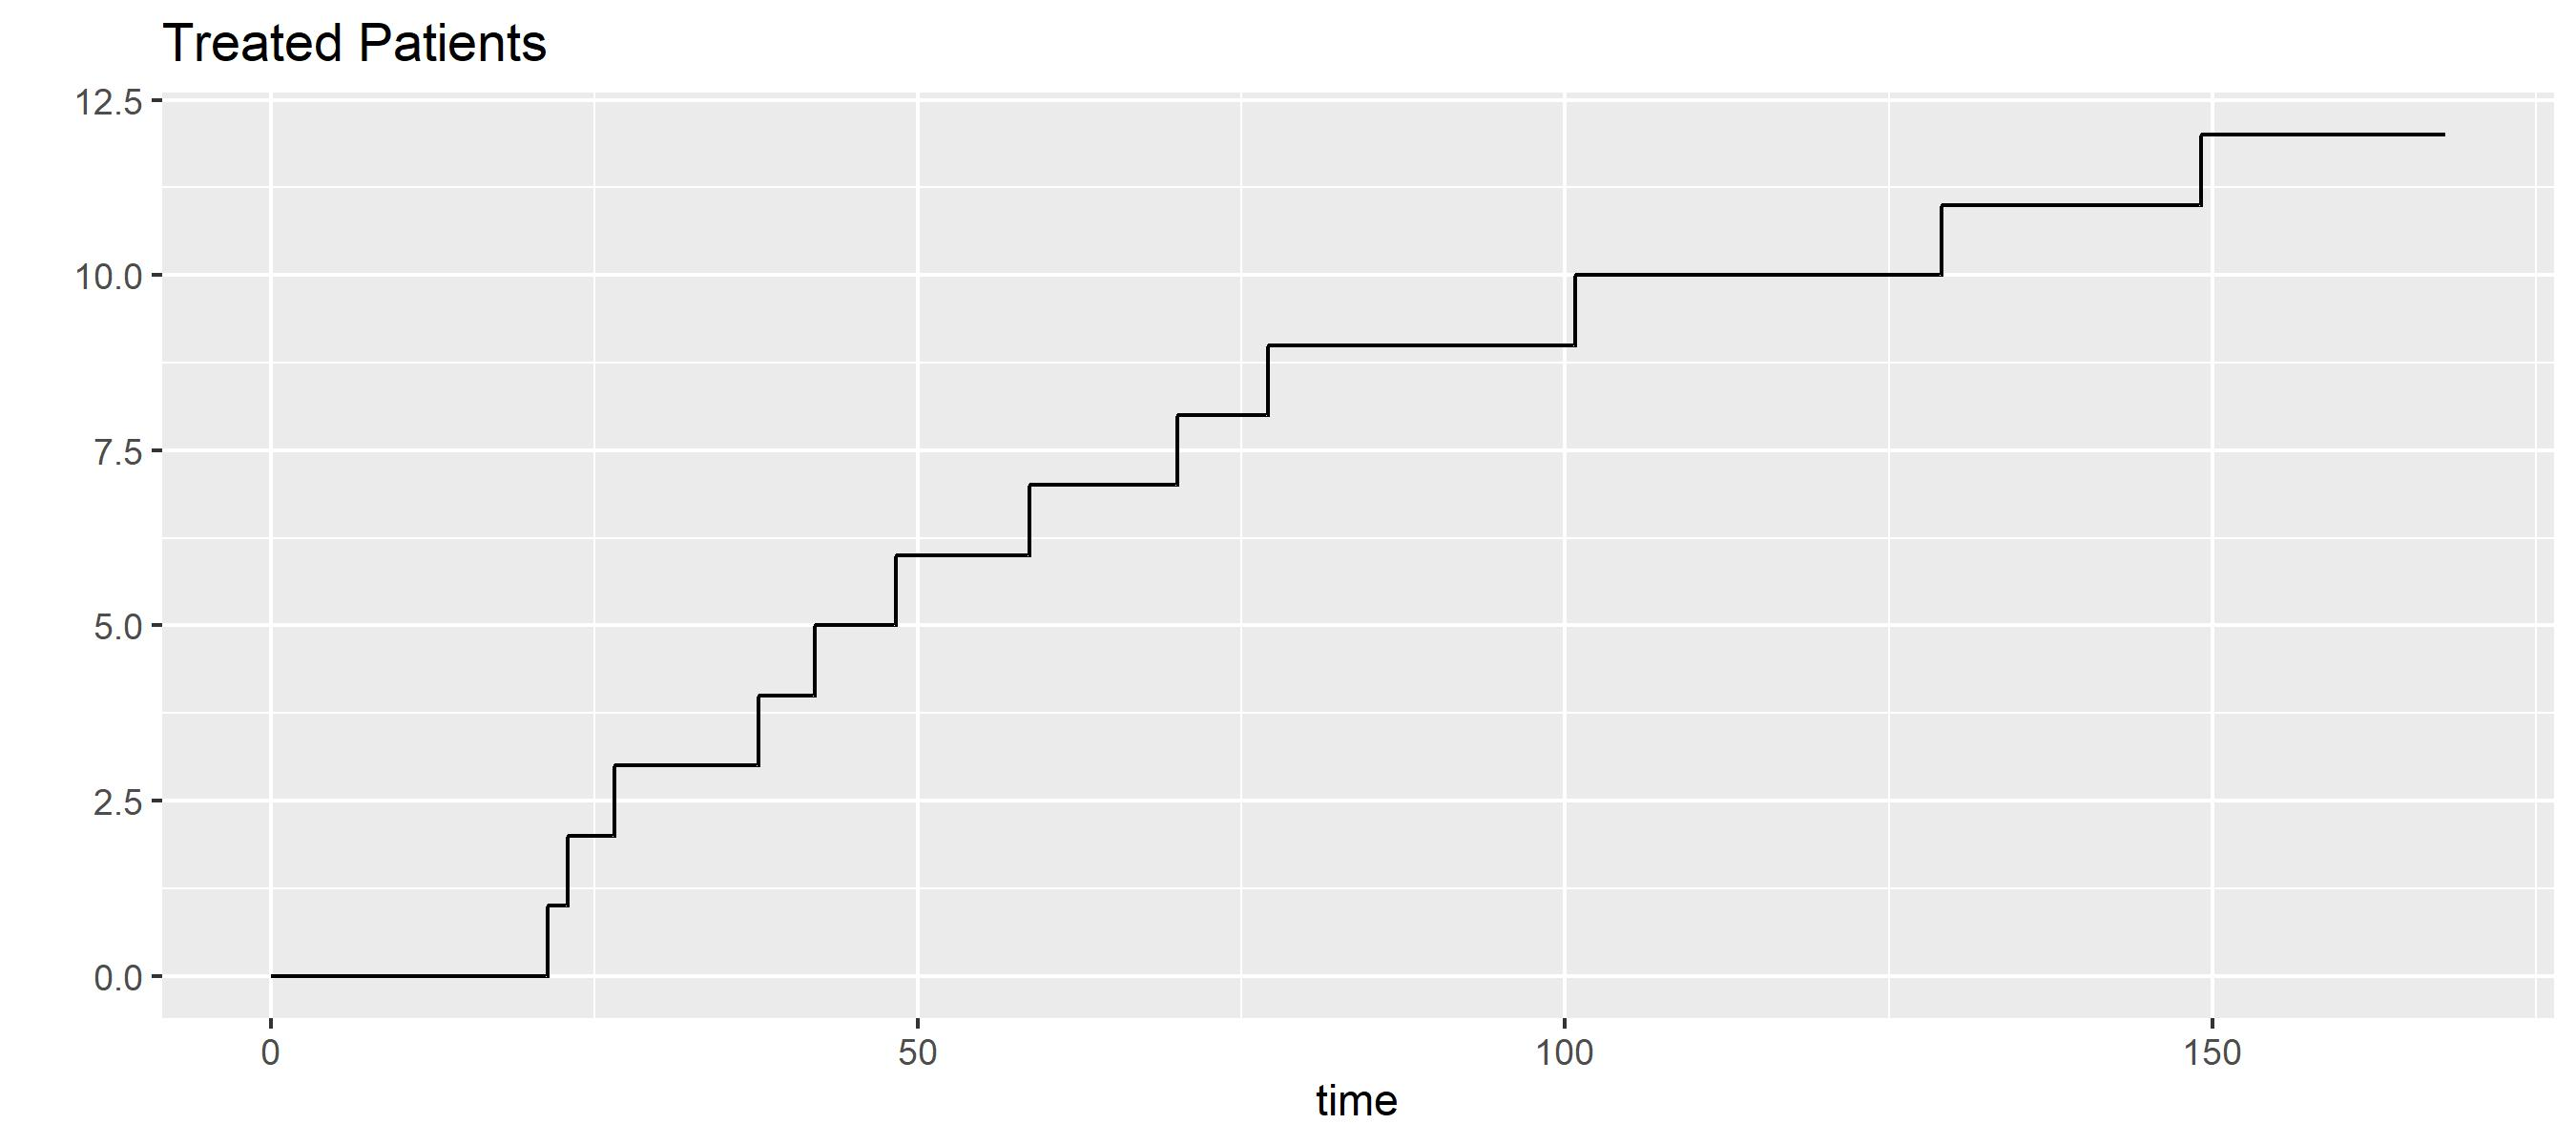

In [17]:
 er.get<MetricTimeline>(named(TREATED_MONITOR)).display("Treated Patients")

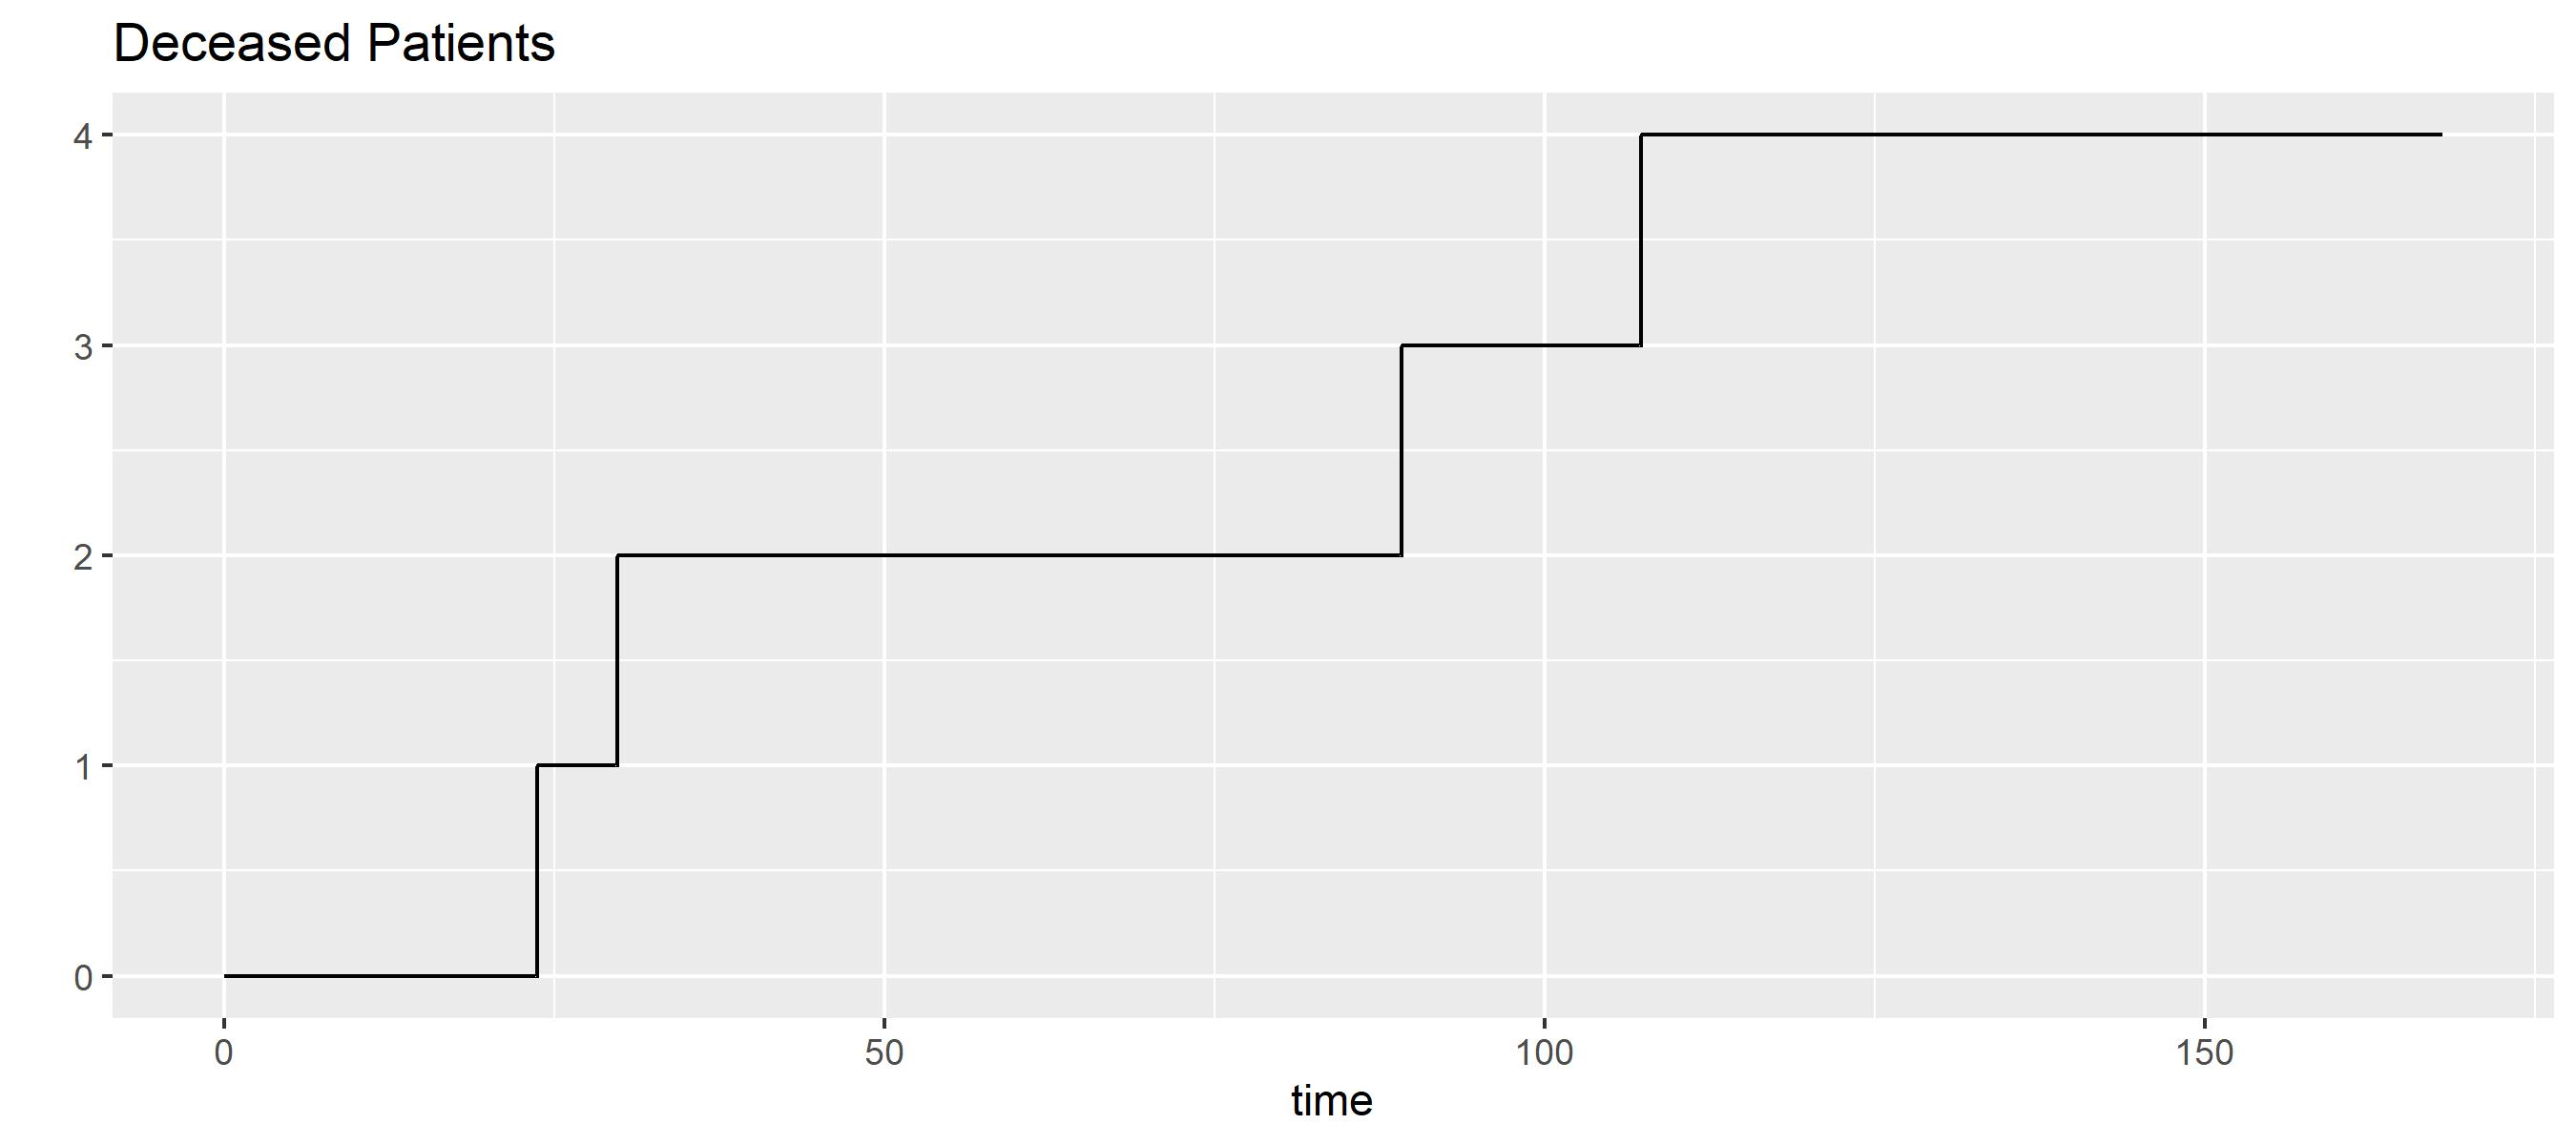

In [16]:
 er.get<MetricTimeline>(named(DECEASED_MONITOR)).display("Deceased Patients")

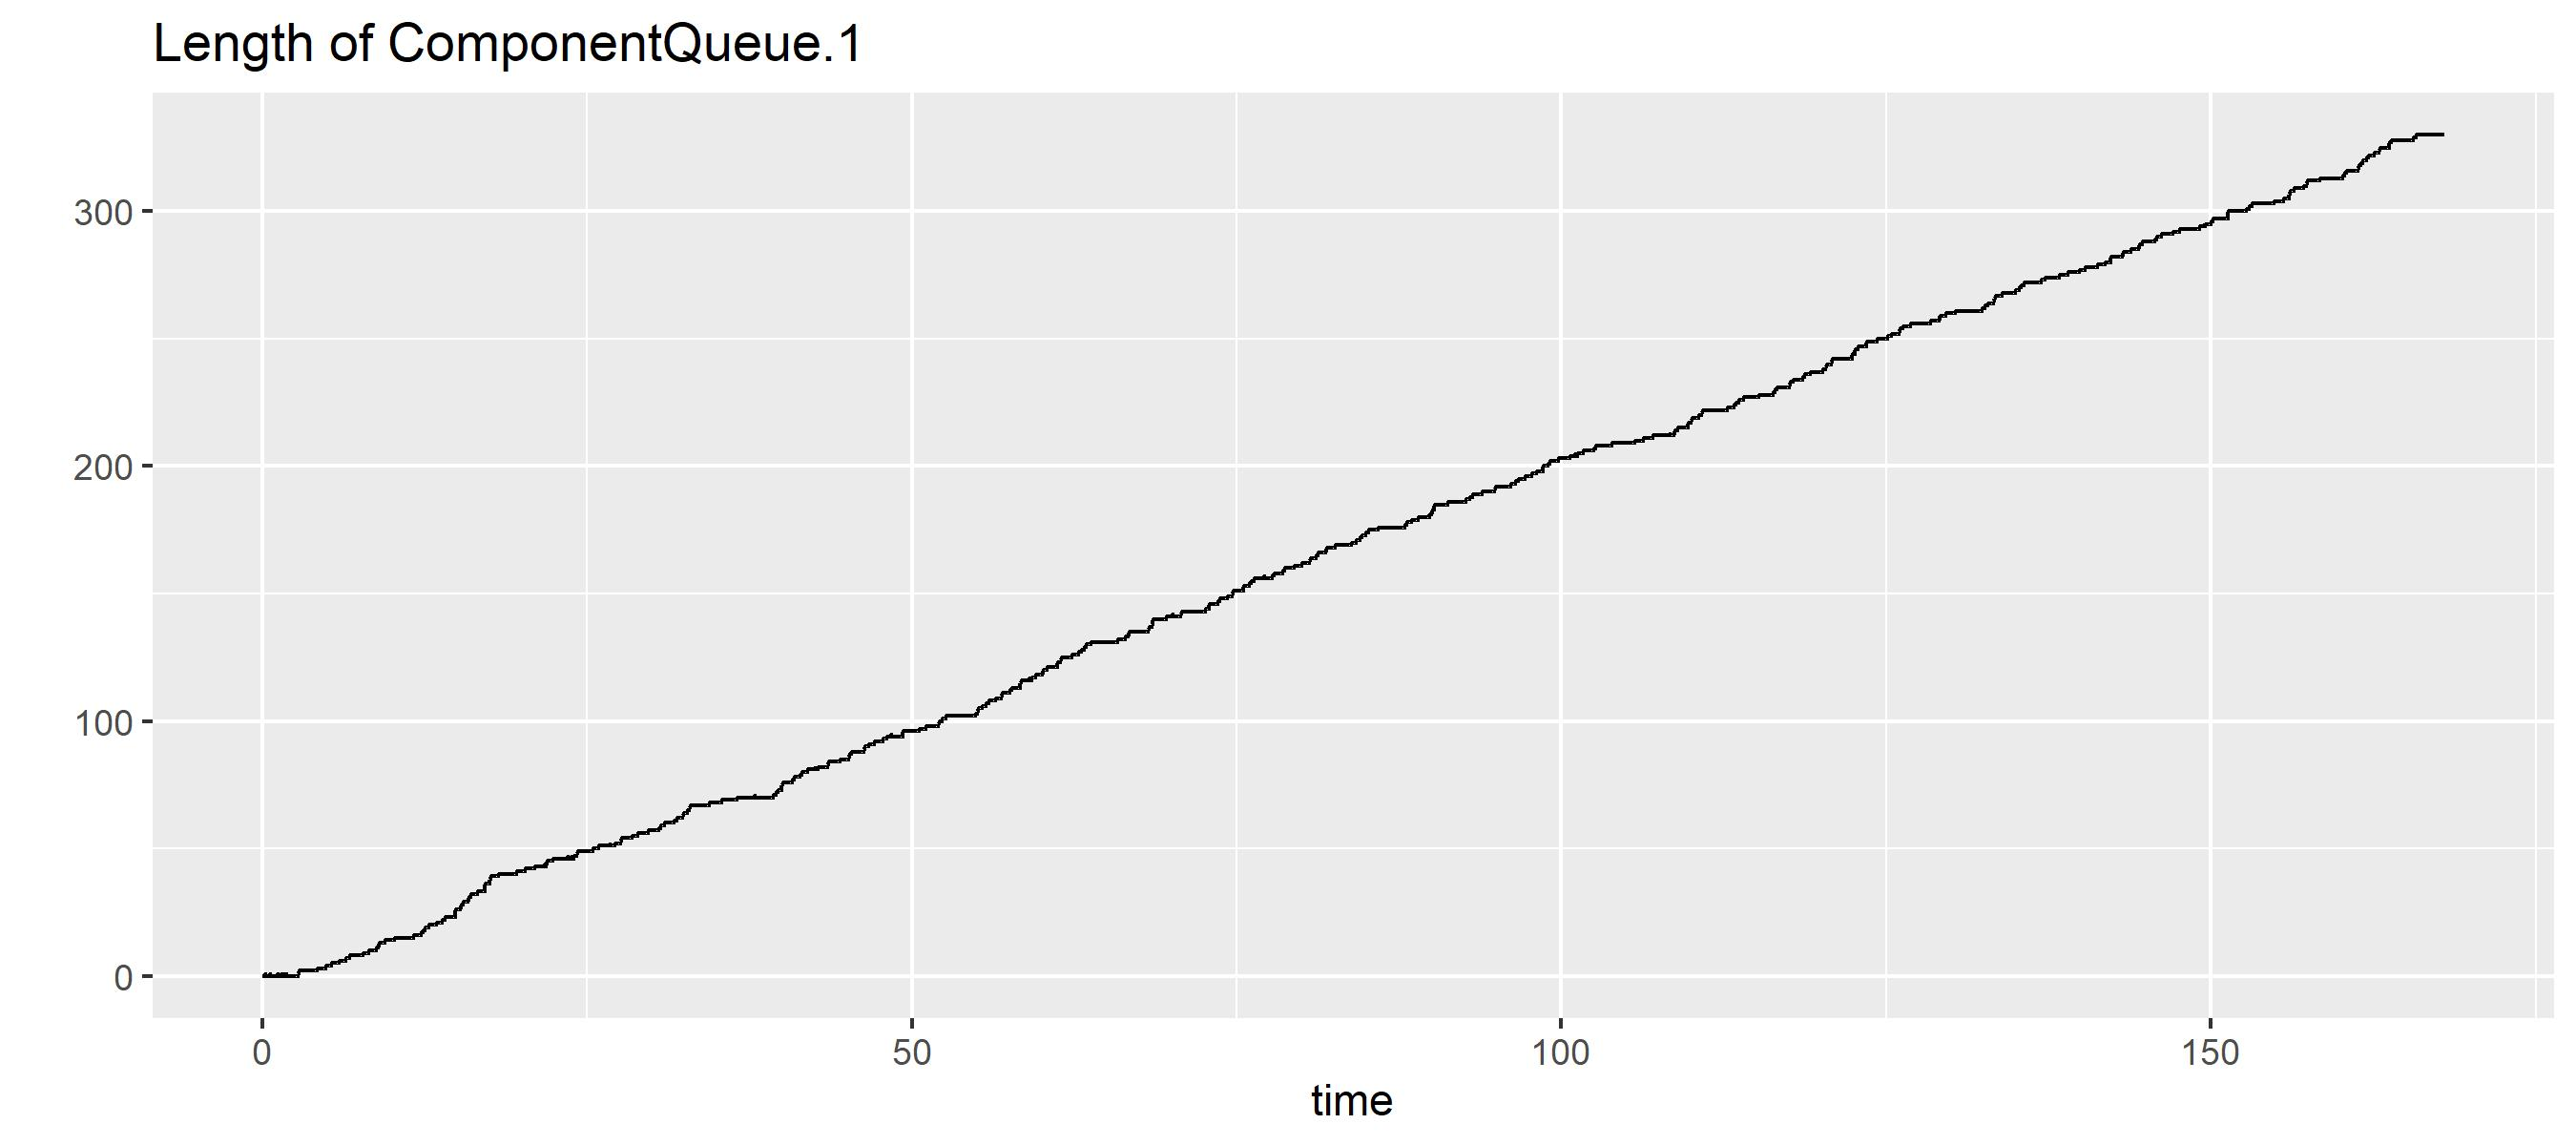

In [20]:
er.get<HeadNurse>().waitingLine.queueLengthMonitor.display()

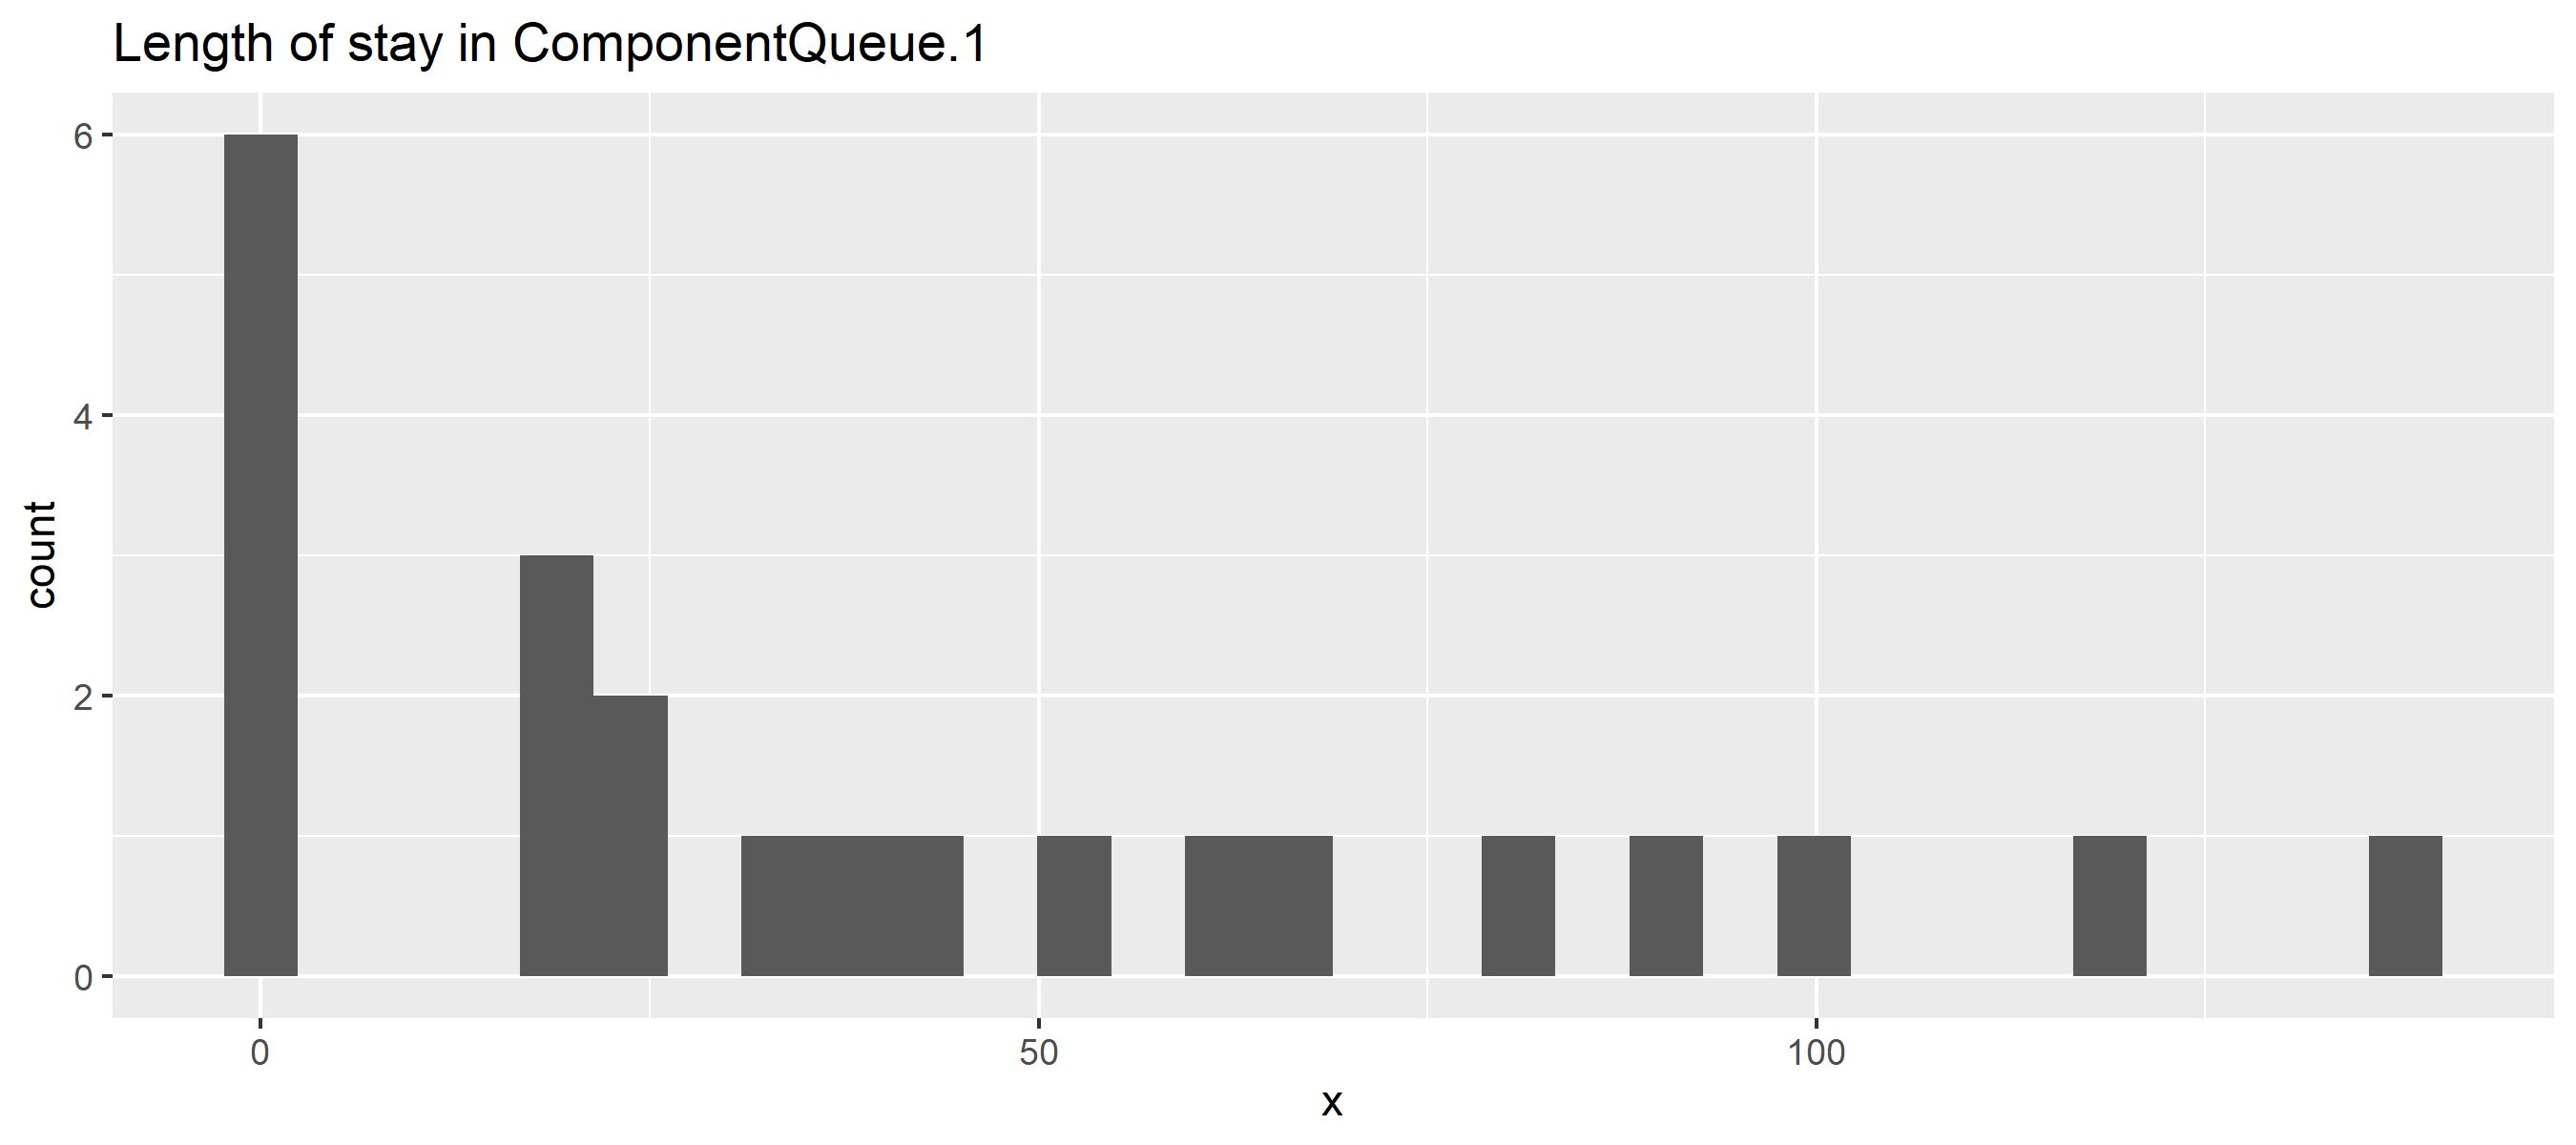

In [10]:
  er.get<HeadNurse>().waitingLine.lengthOfStayMonitor.display("Length")

## Analysis

In [11]:
data class RequestRecord(val requester: String, val timestamp: Double, val resource: String, val quantity: Double)

val tc = sim.get<TraceCollector>()
val requests = tc.filterIsInstance<ResourceEvent>().map {
    val amountDirected = (if(it.type == ResourceEventType.RELEASED) -1 else 1) * it.amount
    RequestRecord(it.requester.name, it.time, it.resource.name, amountDirected)
}

val requestsDf = requests.asDataFrame()
    .groupBy("requester")
    .sortedBy("requester", "timestamp")
    .addColumn("end_time") { it["timestamp"].lead() }
    .filter { it["quantity"] gt 0 }
    .addColumn("state") { rowNumber.map { if(it.rem(2) == 0) "hungry" else "eating" } }
    .ungroup()

Line_13.jupyter-kts (3:10 - 13) Unresolved reference: sim
Line_13.jupyter-kts (5:30 - 32) Unresolved reference: it
Line_13.jupyter-kts (5:30 - 67) Comparison of incompatible enums '[ERROR : <ERROR PROPERTY TYPE>]' and 'ResourceEventType' is always unsuccessful
Line_13.jupyter-kts (5:82 - 84) Unresolved reference: it
Line_13.jupyter-kts (6:19 - 21) Unresolved reference: it
Line_13.jupyter-kts (6:38 - 40) Unresolved reference: it
Line_13.jupyter-kts (6:47 - 49) Unresolved reference: it
Line_13.jupyter-kts (12:30 - 32) Unresolved reference: it
Line_13.jupyter-kts (13:15 - 17) Unresolved reference: it
Line_13.jupyter-kts (14:27 - 36) Unresolved reference. None of the following candidates is applicable because of receiver type mismatch: 
internal val DataFrame.rowNumber: List<Int> defined in krangl
Line_13.jupyter-kts (14:46 - 48) Unresolved reference: it

In [12]:
 requestsDf.schema()

Line_14.jupyter-kts (1:2 - 12) Unresolved reference: requestsDf

Inspect the table with resource request data

In [13]:
requestsDf.head(10)


Line_15.jupyter-kts (1:1 - 11) Unresolved reference: requestsDf

Let's try to visualize these data similar to https://r-simmer.org/articles/simmer-08-philosophers.html

In [15]:
requestsDf.plot(x = "timestamp", xend = "end_time", y = "requester", yend = "requester", color = "state")
        .geomSegment(size = 15.0)

Line_17.jupyter-kts (1:1 - 11) Unresolved reference: requestsDf

It is with great relief, that all 4 philosophers get a firm handle on 2 forks to enjory the tasty sphaghetti!



## Conclusion & Summary

In this article we have worked out a complex process with partially non-intuitive process dynamics can be modelled with kalasim and optimized using insights from operations research.

Disclaimer: The author is not a medical doctor, so please excuse possible inprecsion in wording and lack of ER process understanding. Feel welcome to suggest corrections or improvements

[comment]: <> (// **TODO**  use https://github.com/DiUS/java-faker)
